In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

#### The null hypothesis is that the sample is not drawn from the reference distribution, so if p>0.05 then reject null hypothesis, they are drawn from that distribution. [see stats_helper.py]

In [3]:
def pcheck(p,null_hyp):
    '''
    if p>0.05 then reject null hypothesis
    '''
    if p>0.05:
        return  null_hyp
    else:
        return "NOT "+null_hyp

In [4]:
def one_way_kolmogorov_smirnov(data,name,distr_name):
	'''
	See if data come from the reference distribution
	'''
	result = stats.kstest(data,distr_name)
	print "{0} : D = {1} ; p ={2} ---> {3}".format(name,np.around(result[0],2),np.around(result[1],2),pcheck(result[1],"from {} distribution".format(distr_name)))

In [5]:
def basic_stats(data1,data2,mode="double"):
	print "Precision: mu = {0}; std = {1}".format(np.around(mean(data1),3),np.around(std(data1),3))
	if mode=="double": print "Recall: mu = {0}; std = {1}".format(np.around(mean(data2),3),np.around(std(data2),3))

In [6]:
def basic_stat(data1,name):
	print "{0}: mu = {1}; std = {2}".format(name,np.around(mean(data1),3),np.around(std(data1),3))
	return [name,np.around(mean(data1),3),np.around(std(data1),3)]

In [13]:
from scipy.stats import *

In [10]:
from tabulate import tabulate

Precision [COCO]: mu = 0.869; std = 0.227
Recall [COCO]: mu = 0.897; std = 0.132
Jaccard [COCO]: mu = 0.789; std = 0.227
Precision [Self]: mu = 0.864; std = 0.206
Recall [Self]: mu = 0.901; std = 0.145
Jaccard [Self]: mu = 0.785; std = 0.219


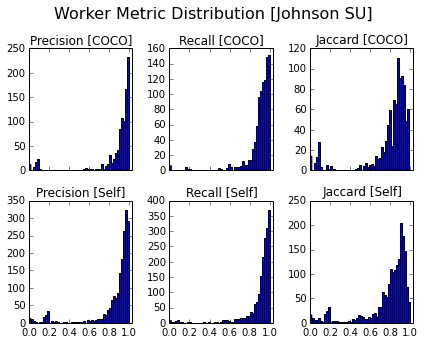

In [251]:
bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
               'Precision [Self]','Recall [Self]','Jaccard [Self]']
FILTER_CRITERION=0
NUM_COL = 3
NUM_ROW = 2
NUM_PLOTS = NUM_COL*NUM_ROW

fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
fig.suptitle("All Worker Metric Distribution ",fontsize=16,y=1.05)

axs = axs.ravel()
table_data = []
for i,metric in zip(range(len(metrics_lst)),metrics_lst):
    metric_value = np.array(bb_info[metric][bb_info[metric]>0][bb_info[metric]<=1]) 
    table_data.append(basic_stat(metric_value,metric))
    ax = axs[i]
    ax.set_title(metric)
    ax.hist(metric_value,bins=50)
    ax.set_xlim(0,1.03)
fig.tight_layout()
fig.savefig('metric_histogram.pdf')

In [11]:
print tabulate(table_data,headers=["All","Mean","SD"],tablefmt='latex')

\begin{tabular}{lrr}
\hline
 All              &   Mean &    SD \\
\hline
 Precision [COCO] &  0.869 & 0.227 \\
 Recall [COCO]    &  0.897 & 0.132 \\
 Jaccard [COCO]   &  0.789 & 0.227 \\
 Precision [Self] &  0.864 & 0.206 \\
 Recall [Self]    &  0.901 & 0.145 \\
 Jaccard [Self]   &  0.785 & 0.219 \\
\hline
\end{tabular}


# Good Worker's Measures 

Precision [COCO]: mu = 0.931; std = 0.068
COCO Precision : D = 0.5 ; p =0.0 ---> NOT from expon distribution
COCO Precision : D = 0.75 ; p =0.0 ---> NOT from norm distribution
COCO Precision : D = 0.69 ; p =0.0 ---> NOT from cauchy distribution
Recall [COCO]: mu = 0.917; std = 0.07
COCO Precision : D = 0.49 ; p =0.0 ---> NOT from expon distribution
COCO Precision : D = 0.74 ; p =0.0 ---> NOT from norm distribution
COCO Precision : D = 0.68 ; p =0.0 ---> NOT from cauchy distribution
Jaccard [COCO]: mu = 0.858; std = 0.082
COCO Precision : D = 0.46 ; p =0.0 ---> NOT from expon distribution
COCO Precision : D = 0.73 ; p =0.0 ---> NOT from norm distribution
COCO Precision : D = 0.67 ; p =0.0 ---> NOT from cauchy distribution
Precision [Self]: mu = 0.918; std = 0.076
COCO Precision : D = 0.49 ; p =0.0 ---> NOT from expon distribution
COCO Precision : D = 0.74 ; p =0.0 ---> NOT from norm distribution
COCO Precision : D = 0.67 ; p =0.0 ---> NOT from cauchy distribution
Recall [Self]: mu = 0.9

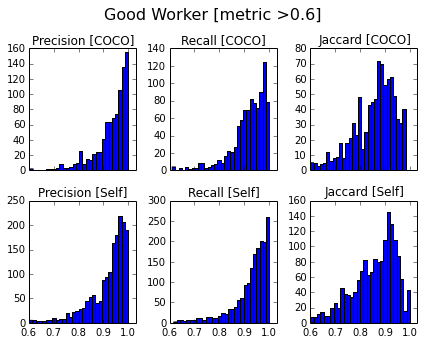

In [15]:
metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
               'Precision [Self]','Recall [Self]','Jaccard [Self]']
FILTER_CRITERION = 0.6
NUM_COL = 3
NUM_ROW = 2
NUM_PLOTS = NUM_COL*NUM_ROW

fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
fig.suptitle("Good Worker [metric >{}]".format(FILTER_CRITERION),fontsize=16,y=1.05)
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

table_data = []
for i,metric in zip(range(len(metrics_lst)),metrics_lst):
    metric_value = np.array(bb_info[metric][bb_info[metric]>FILTER_CRITERION][bb_info[metric]<=1]) 
    table_data.append(basic_stat(metric_value,metric))
    ax = axs[i]
    ax.set_title(metric)
    ax.hist(metric_value,bins=30)
    ax.set_xlim(FILTER_CRITERION,1.03)
    #Testing against various distributions 
    for test_distr in ['expon','norm','cauchy']:
        one_way_kolmogorov_smirnov(metric_value,'COCO Precision',test_distr)
fig.tight_layout()
fig.savefig('good_worker_metric_histogram.pdf')

In [16]:
print tabulate(table_data,headers=["Mean","SD"],tablefmt='latex')

\begin{tabular}{lrr}
\hline
                  &   Mean &    SD \\
\hline
 Precision [COCO] &  0.931 & 0.068 \\
 Recall [COCO]    &  0.917 & 0.07  \\
 Jaccard [COCO]   &  0.858 & 0.082 \\
 Precision [Self] &  0.918 & 0.076 \\
 Recall [Self]    &  0.925 & 0.073 \\
 Jaccard [Self]   &  0.858 & 0.086 \\
\hline
\end{tabular}


The key difference between directly using a one way kolomogorov smirnov test against some given pdf is that the parameters of that pdf is not fitted. So instead what we should do is fit the function first, then conduct a two-way KS test on the fitted data and the actual data to see if the distributions are the same (and whether that is statistically significant. The fitting is done with the MLE parameters. We exclude the ones that don't have fitting function implemented.

In [22]:
def kolmogorov_smirnov(data1,data2,name):
	'''
	Two-way KS test . See if data come from the same distribution
	'''
	result = stats.ks_2samp(data1,data2)
	if result[1]>0.05: print "{0} : D = {1} ; p ={2} ---> {3}".format(name,np.around(result[0],2),np.around(result[1],2),pcheck(result[1],"from same distribution"))
	return result

Test this against all distributions 

In [468]:
print dir(stats.distributions)[9:]

['alpha', 'anglit', 'arcsine', 'bernoulli', 'beta', 'betaprime', 'binom', 'boltzmann', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'division', 'dlaplace', 'dweibull', 'entropy', 'erlang', 'expon', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'genpareto', 'geom', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypergeom', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'logser', 'lomax', 'maxwell', 'mielke', 'nakagami', 'nbinom', 'ncf', 'nct', 'ncx2', 'norm', 'pareto', 'pearson3', 'planck', 'poisson', 'powerlaw', 'powerlognorm', 'powernorm', 'print_function', 'randint', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'r

In [18]:
import scipy.stats

In [19]:
exclude= ['division', 'skellam', 'nbinom', 'logser', 'erlang','dlaplace', 'hypergeom', 'bernoulli', 'levy_stable', 'zipf', 'rv_discrete', 'rv_frozen', 'boltzmann', 'rv_continuous', 'entropy', 'randint', 'poisson', 'geom', 'binom', 'planck', 'print_function']

In [511]:
print filter(lambda x: x not in exclude,dir(stats.distributions)[9:])

['alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy']


We find that trying to do datafitting with only filtered good workers is not great, it means most distributions doesn't fit (because outlier are not completely clean since most of these are long tail disstributions ).

Precision [COCO]: mu = 0.931; std = 0.068
RSS: 55.2710138862
R:  0.49947367802
RSS: 142.637493015
R:  -0.787330268869
RSS: 1.49644493524e+27
R:  -0.306186217848
RSS: 612003792.603
R:  -0.306723289464
RSS: 825.458385251
R:  -0.774117283746
RSS: 192.945094788
R:  -0.967688941986
RSS: 3.26638068962e+47
R:  -0.306186217848
RSS: 386.983908706
R:  -0.747678425197
RSS: 1.15172452336e+16
R:  -0.306186337944
RSS: 3.32547168588e+12
R:  -0.306192706736
RSS: 161.269840078
R:  -0.89012497155
RSS: 354.577519284
R:  -0.849792821886
RSS: 345.776455401
R:  -0.843930502156
RSS: 462.278693209
R:  -0.744141818705
RSS: 6.72928464266e+16
R:  -0.306186267513
RSS: 470.495423131
R:  -0.743411442695
RSS: 776.427835357
R:  -0.782944278589
RSS: 545.108320958
R:  -0.77243864345
RSS: 1.6276949456e+25
R:  -0.30618621785
RSS: 582.659978958
R:  -0.794690048137
RSS: 465.635469696
R:  -0.924083601436
RSS: 8.14995628975e+21
R:  0.30618621791
RSS: 463.510456327
R:  -0.746670658459
RSS: 18597.7702492
R:  -0.405697120781
RS

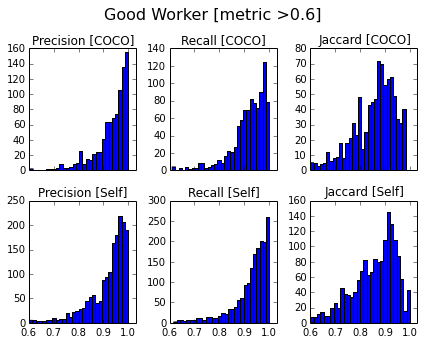

In [512]:
bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
               'Precision [Self]','Recall [Self]','Jaccard [Self]']
FILTER_CRITERION = 0.6
NUM_COL = 3
NUM_ROW = 2
NUM_PLOTS = NUM_COL*NUM_ROW

fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
fig.suptitle("Good Worker [metric >{}]".format(FILTER_CRITERION),fontsize=16,y=1.05)
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

table_data = []
for i,metric in zip(range(len(metrics_lst)),metrics_lst):
    metric_value = np.array(bb_info[metric][bb_info[metric]>FILTER_CRITERION][bb_info[metric]<=1]) 
    table_data.append(basic_stat(metric_value,metric))
    ax = axs[i]
    ax.set_title(metric)
    ax.hist(metric_value,bins=30)
    ax.set_xlim(FILTER_CRITERION,1.03)
    #Testing against various distributions 
    
    for fcn_name in filter(lambda x: x not in exclude,dir(stats.distributions)[9:]):
        # Based on MLE estimate for fitting
        try:
            fcn = getattr(scipy.stats,fcn_name)
            params = fcn.fit(1-metric_value)
            histo,bins = np.histogram(1-metric_value, 30, normed=1)
            y = fcn.pdf(bins, *params)
            RSS =sum((bins-y)**2)
            R = np.corrcoef(bins,y)[0][1]
            print "RSS:",RSS
            print "R: ",R
            kolmogorov_smirnov(bins,y,fcn_name)
        except(AttributeError,NotImplementedError,TypeError):
            #function has no fitting
            print "Skipped", fcn_name
fig.tight_layout()
fig.savefig('good_worker_metric_histogram.pdf')

Pearson's R tests strength of a linear association between two variables. It is probably not the best test for this application 

In [107]:
bins

array([  5.07604100e-05,   3.33824017e-02,   6.67140430e-02,
         1.00045684e-01,   1.33377326e-01,   1.66708967e-01,
         2.00040608e-01,   2.33372250e-01,   2.66703891e-01,
         3.00035532e-01,   3.33367174e-01,   3.66698815e-01,
         4.00030456e-01,   4.33362098e-01,   4.66693739e-01,
         5.00025380e-01,   5.33357022e-01,   5.66688663e-01,
         6.00020304e-01,   6.33351945e-01,   6.66683587e-01,
         7.00015228e-01,   7.33346869e-01,   7.66678511e-01,
         8.00010152e-01,   8.33341793e-01,   8.66673435e-01,
         9.00005076e-01,   9.33336717e-01,   9.66668359e-01,
         1.00000000e+00])

In [109]:
np.roll(bins,-1)

array([  3.33824017e-02,   6.67140430e-02,   1.00045684e-01,
         1.33377326e-01,   1.66708967e-01,   2.00040608e-01,
         2.33372250e-01,   2.66703891e-01,   3.00035532e-01,
         3.33367174e-01,   3.66698815e-01,   4.00030456e-01,
         4.33362098e-01,   4.66693739e-01,   5.00025380e-01,
         5.33357022e-01,   5.66688663e-01,   6.00020304e-01,
         6.33351945e-01,   6.66683587e-01,   7.00015228e-01,
         7.33346869e-01,   7.66678511e-01,   8.00010152e-01,
         8.33341793e-01,   8.66673435e-01,   9.00005076e-01,
         9.33336717e-01,   9.66668359e-01,   1.00000000e+00,
         5.07604100e-05])

array([ 0.01671658,  0.05004822,  0.08337986,  0.11671151,  0.15004315,
        0.18337479,  0.21670643,  0.25003807,  0.28336971,  0.31670135,
        0.35003299,  0.38336464,  0.41669628,  0.45002792,  0.48335956,
        0.5166912 ,  0.55002284,  0.58335448,  0.61668612,  0.65001777,
        0.68334941,  0.71668105,  0.75001269,  0.78334433,  0.81667597,
        0.85000761,  0.88333926,  0.9166709 ,  0.95000254,  0.98333418])

In [100]:
len(histo)

30

Precision [COCO]: mu = 0.869; std = 0.227
frechet_l : D = 0.26 ; p =0.06 ---> from same distribution
levy : D = 0.22 ; p =0.15 ---> from same distribution
weibull_max : D = 0.26 ; p =0.06 ---> from same distribution
Recall [COCO]: mu = 0.897; std = 0.132
exponweib : D = 0.22 ; p =0.15 ---> from same distribution
frechet_r : D = 0.22 ; p =0.15 ---> from same distribution
gengamma : D = 0.24 ; p =0.1 ---> from same distribution
pareto : D = 0.2 ; p =0.24 ---> from same distribution
wald : D = 0.26 ; p =0.06 ---> from same distribution
weibull_min : D = 0.22 ; p =0.15 ---> from same distribution
Jaccard [COCO]: mu = 0.789; std = 0.227
dweibull : D = 0.24 ; p =0.1 ---> from same distribution
levy : D = 0.22 ; p =0.15 ---> from same distribution
Precision [Self]: mu = 0.864; std = 0.206
beta : D = 0.26 ; p =0.06 ---> from same distribution
frechet_r : D = 0.24 ; p =0.1 ---> from same distribution
genextreme : D = 0.26 ; p =0.06 ---> from same distribution
reciprocal : D = 0.22 ; p =0.15 ---

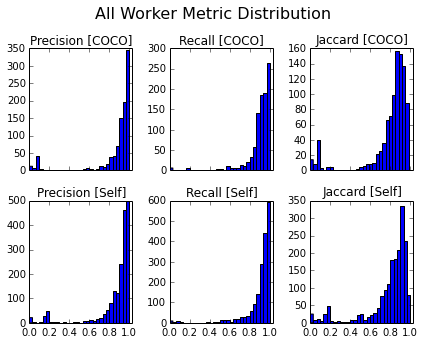

In [250]:
metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
               'Precision [Self]','Recall [Self]','Jaccard [Self]']
FILTER_CRITERION = 0
NUM_COL = 3
NUM_ROW = 2
NUM_PLOTS = NUM_COL*NUM_ROW

fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
fig.suptitle("All Worker Metric Distribution",fontsize=16,y=1.05)
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

table_data = []
data_fit_stats=[]
for i,metric in zip(range(len(metrics_lst)),metrics_lst):
    metric_value = np.array(bb_info[metric][bb_info[metric]>FILTER_CRITERION][bb_info[metric]<=1]) 
    table_data.append(basic_stat(metric_value,metric))
    ax = axs[i]
    ax.set_title(metric)
    ax.hist(metric_value,bins=30)
    ax.set_xlim(FILTER_CRITERION,1.03)
    #Testing against various distributions 
    
    for fcn_name in filter(lambda x: x not in exclude,dir(stats.distributions)[9:]):
        # Based on MLE estimate for fitting
        try:
            fcn = getattr(scipy.stats,fcn_name)
            params = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, 50, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, *params)
            RSS =sum((histo-y)**2)
#            R = np.corrcoef(bins,y)[0][1]
#             print "RSS:",RSS
#             print "R: ",R
            ks_result = kolmogorov_smirnov(bins,y,fcn_name) #D-value and p-value
            data_stats  = [metric,fcn_name,params,RSS]
            data_stats.extend(ks_result)
            data_fit_stats.append(data_stats)
        except(AttributeError,NotImplementedError,TypeError):
            #function has no fitting
            print "Skipped", fcn_name
fig.tight_layout()
fig.savefig('good_worker_metric_histogram.pdf', bbox_inches='tight',bbox_extra_artists=[stitle])

In [130]:
import pandas as pd 

In [131]:
df_stats_tbl = pd.DataFrame(data_fit_stats,columns=["metric","Function Name", "Parameters","RSS","D-value","p-value"])

In [132]:
sorted_df_stats_tbl = df_stats_tbl[df_stats_tbl["p-value"]>0.05].sort(["RSS","p-value"],ascending=[True,False])

In [189]:
idx = sorted_df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==sorted_df_stats_tbl["RSS"]
sorted_df_stats_tbl[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
463,Jaccard [Self],johnsonsu,"(1.61324514346, 0.946711114866, 0.964000379431...",2.387430,0.300000,0.108838
211,Jaccard [COCO],johnsonsu,"(5.72069415735, 1.11056594449, 0.993970437504,...",5.744955,0.300000,0.108838
42,Precision [COCO],johnsonsb,"(-1.88875780449, 0.616922033397, -0.2392018162...",6.326296,0.300000,0.108838
276,Precision [Self],gausshyper,"(3.75296975347, 0.873485800835, 1.188614142, -...",10.675322,0.333333,0.054993
357,Recall [Self],frechet_l,"(0.836385712166, 1.0, 0.143277359025)",19.187239,0.266667,0.200325
417,Recall [Self],weibull_max,"(0.836385712166, 1.0, 0.143277359025)",19.187239,0.266667,0.200325
164,Recall [COCO],wald,"(-0.056917333933, 1.42467944889)",140.255542,0.266667,0.200325


In [240]:
print tabulate(sorted_df_stats_tbl[idx].drop("Parameters",axis=1),showindex="False",headers='keys',tablefmt='latex')

\begin{tabular}{llrrr}
\hline
 metric           & Function Name   &       RSS &   D-value &   p-value \\
\hline
 Jaccard [Self]   & johnsonsu       &   2.38743 &  0.3      &  0.108838 \\
 Jaccard [COCO]   & johnsonsu       &   5.74496 &  0.3      &  0.108838 \\
 Precision [COCO] & johnsonsb       &   6.3263  &  0.3      &  0.108838 \\
 Precision [Self] & gausshyper      &  10.6753  &  0.333333 &  0.054993 \\
 Recall [Self]    & frechet\_l       &  19.1872  &  0.266667 &  0.200325 \\
 Recall [Self]    & weibull\_max     &  19.1872  &  0.266667 &  0.200325 \\
 Recall [COCO]    & wald            & 140.256   &  0.266667 &  0.200325 \\
\hline
\end{tabular}


In [188]:
idx = df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==df_stats_tbl["RSS"]
df_stats_tbl[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
43,Precision [COCO],johnsonsu,"(4.987239768, 0.745722297166, 1.00124979082, 0...",5.321721,0.366667,0.025856
133,Recall [COCO],loggamma,"(0.049229042954, 0.997720517325, 0.00486338437...",4.485873,0.466667,0.001746
211,Jaccard [COCO],johnsonsu,"(5.72069415735, 1.11056594449, 0.993970437504,...",5.744955,0.300000,0.108838
295,Precision [Self],johnsonsu,"(5.33184837865, 0.851142149403, 1.00453093801,...",5.638033,0.366667,0.025856
379,Recall [Self],johnsonsu,"(5.69381213468, 0.913610446575, 1.00527681484,...",3.615871,0.433333,0.004607
463,Jaccard [Self],johnsonsu,"(1.61324514346, 0.946711114866, 0.964000379431...",2.387430,0.300000,0.108838


In [186]:
idx = df_stats_tbl.groupby(['metric'])['p-value'].transform(max) ==df_stats_tbl["p-value"]
df_stats_tbl[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
47,Precision [COCO],levy,"(5.07608021376e-05, 0.21151594579)",188.778412,0.200000,0.537200
145,Recall [COCO],pareto,"(0.585272532982, 0.00136391276431, 0.160725144...",169.338182,0.200000,0.537200
215,Jaccard [COCO],levy,"(0.000221510686709, 0.231142285658)",98.231416,0.233333,0.342034
321,Precision [Self],reciprocal,"(0.0259449988258, 1.65051671561, 0.00302033482...",185.519095,0.200000,0.537200
358,Recall [Self],frechet_r,"(0.665818946832, 5.01890957791e-05, 0.29044000...",220.099401,0.233333,0.342034
395,Recall [Self],ncx2,"(0.00148406213766, 2.99883900494, 5.0189095779...",180.028529,0.233333,0.342034
418,Recall [Self],weibull_min,"(0.665818946832, 5.01890957791e-05, 0.29044000...",220.099401,0.233333,0.342034
489,Jaccard [Self],reciprocal,"(0.0156189797221, 2.13256677213, 0.00137280277...",265.685966,0.200000,0.537200


In [166]:
# idx = sorted_df_stats_tbl.groupby(['metric']).agg({'RSS':'min'})

In [168]:
#Wrong ordering 
# sorted_df_stats_tbl.groupby(["metric"]).min()

In [169]:
#check that index ordering is correct
# sorted_df_stats_tbl[sorted_df_stats_tbl['metric']=='Jaccard [COCO]'][sorted_df_stats_tbl['Function Name']=='johnsonsu']

In [184]:
sorted_df_stats_tbl[sorted_df_stats_tbl['Function Name']=='johnsonsu']

,metric,Function Name,Parameters,RSS,D-value,p-value
463,Jaccard [Self],johnsonsu,"(1.61324514346, 0.946711114866, 0.964000379431...",2.387430,0.3,0.108838
211,Jaccard [COCO],johnsonsu,"(5.72069415735, 1.11056594449, 0.993970437504,...",5.744955,0.3,0.108838


In [192]:
df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu']

,metric,Function Name,Parameters,RSS,D-value,p-value
43,Precision [COCO],johnsonsu,"(4.987239768, 0.745722297166, 1.00124979082, 0...",5.321721,0.366667,0.025856
127,Recall [COCO],johnsonsu,"(5.95576995563, 1.0942737693, 1.00675438945, 0...",6.332398,0.433333,0.004607
211,Jaccard [COCO],johnsonsu,"(5.72069415735, 1.11056594449, 0.993970437504,...",5.744955,0.300000,0.108838
295,Precision [Self],johnsonsu,"(5.33184837865, 0.851142149403, 1.00453093801,...",5.638033,0.366667,0.025856
379,Recall [Self],johnsonsu,"(5.69381213468, 0.913610446575, 1.00527681484,...",3.615871,0.433333,0.004607
463,Jaccard [Self],johnsonsu,"(1.61324514346, 0.946711114866, 0.964000379431...",2.387430,0.300000,0.108838


In [242]:
johnsonsu_tbl = df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].drop(['Parameters','Function Name'],axis=1)

In [243]:
johnsonsu_tbl

,metric,RSS,D-value,p-value
43,Precision [COCO],5.321721,0.366667,0.025856
127,Recall [COCO],6.332398,0.433333,0.004607
211,Jaccard [COCO],5.744955,0.300000,0.108838
295,Precision [Self],5.638033,0.366667,0.025856
379,Recall [Self],3.615871,0.433333,0.004607
463,Jaccard [Self],2.387430,0.300000,0.108838


In [245]:
print tabulate(johnsonsu_tbl,headers="keys",showindex="False",tablefmt='latex')

\begin{tabular}{lrrr}
\hline
 metric           &     RSS &   D-value &    p-value \\
\hline
 Precision [COCO] & 5.32172 &  0.366667 & 0.0258563  \\
 Recall [COCO]    & 6.3324  &  0.433333 & 0.00460707 \\
 Jaccard [COCO]   & 5.74496 &  0.3      & 0.108838   \\
 Precision [Self] & 5.63803 &  0.366667 & 0.0258563  \\
 Recall [Self]    & 3.61587 &  0.433333 & 0.00460707 \\
 Jaccard [Self]   & 2.38743 &  0.3      & 0.108838   \\
\hline
\end{tabular}


5.32172086229
6.33239826973
5.74495518089
5.63803307176
3.61587083913
2.38743018813


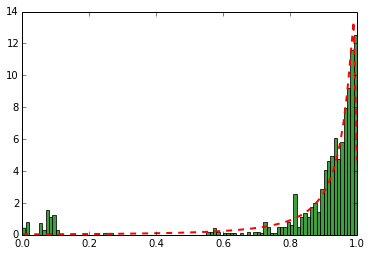

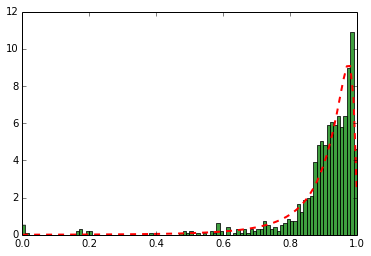

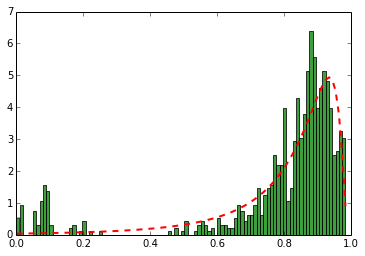

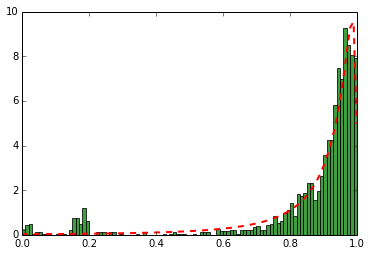

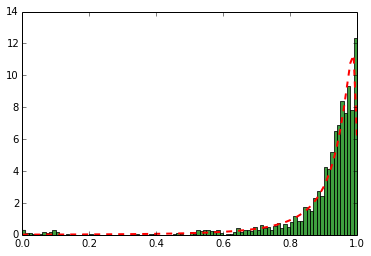

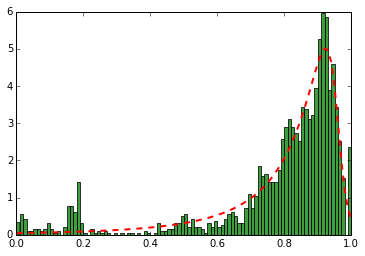

In [194]:
i=0
for row in df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].iterrows():#sorted_df_stats_tbl[idx].iterrows():#sorted_df_stats_tbl.iterrows():
    if i<10:
        plt.figure()
        metric= row[1]["metric"]
        fcn_name= row[1]["Function Name"]
        fcn = getattr(scipy.stats,fcn_name)
        metric_value = np.array(bb_info[metric][bb_info[metric]>0][bb_info[metric]<=1]) 
        params = row[1]["Parameters"]
        n, bins, patches = plt.hist(metric_value, 100, normed=1, facecolor='green', alpha=0.75)
        y = fcn.pdf(bins, *params)
        l = plt.plot(bins, y, 'r--', linewidth=2)    
        plt.xlim(0,1)
        print row[1]["RSS"]
        i+=1
    else: 
        break


In [32]:
df_stats_tbl.to_csv("metric_distr_fitting.csv")

In [61]:
df_stats_tbl[df_stats_tbl["p-value"]>0.05].sort("RSS")

,metric,Function Name,Parameters,RSS,D-value,p-value
34,Precision [COCO],gumbel_r,"(0.73018950392, 0.345316717835)",1.437926e+00,0.322581,0.062059
164,Recall [COCO],wald,"(-0.056917333933, 1.42467944889)",2.964875e+00,0.258065,0.216382
416,Recall [Self],wald,"(-0.0539493028572, 1.40711477389)",3.028063e+00,0.258065,0.216382
367,Recall [Self],gilbrat,"(-0.0108699637169, 0.878399728557)",3.719546e+00,0.290323,0.120028
115,Recall [COCO],gilbrat,"(-0.0143128764229, 0.883272789122)",3.726103e+00,0.290323,0.120028
332,Precision [Self],wald,"(-0.0684521787748, 1.29878137393)",4.017383e+00,0.290323,0.120028
283,Precision [Self],gilbrat,"(-0.0151019516023, 0.816314044904)",4.444440e+00,0.290323,0.120028
500,Jaccard [Self],wald,"(-0.0687650229076, 1.16269990061)",5.430883e+00,0.290323,0.120028
451,Jaccard [Self],gilbrat,"(-0.0169793206683, 0.731577154739)",5.727133e+00,0.322581,0.062059
371,Recall [Self],halfcauchy,"(5.01618306583e-05, 0.89482146426)",5.733607e+00,0.322581,0.062059


### Double check how good the fitting functions really are: 

- Good Worker's Measures (filtered precision, recall >0.6)
- see if timing correlated with precision recall
- average time for a task for worker and good worker
- majority vote score statistics

### Looking at other distributions 

In [235]:
df_stats_tbl[df_stats_tbl['Function Name']=='weibull_max'] #better than weibull min 

,metric,Function Name,Parameters,RSS,D-value,p-value
81,Precision [COCO],weibull_max,"(0.705295337969, 1.0, 0.230584770892)",42.460124,0.266667,0.200325
165,Recall [COCO],weibull_max,"(0.945035891366, 1.0, 0.112470079047)",6.824355,0.400000,0.011314
249,Jaccard [COCO],weibull_max,"(0.983218213539, 0.982677908558, 0.193643246924)",15.025447,0.333333,0.054993
333,Precision [Self],weibull_max,"(0.979947017593, 1.0, 0.123562327868)",9.663935,0.366667,0.025856
417,Recall [Self],weibull_max,"(0.836385712166, 1.0, 0.143277359025)",19.187239,0.266667,0.200325
501,Jaccard [Self],weibull_max,"(1.07808907342, 1.00045886135, 0.22221307837)",14.825714,0.333333,0.054993


In [234]:
df_stats_tbl[df_stats_tbl['Function Name']=='expon']

,metric,Function Name,Parameters,RSS,D-value,p-value
13,Precision [COCO],expon,"(0.550078857577, 0.376716803012)",161.183185,0.566667,0.000062
97,Recall [COCO],expon,"(5.02058953716e-05, 0.971425824604)",146.791429,0.366667,0.025856
181,Jaccard [COCO],expon,"(0.457476522444, 0.392702609347)",78.758384,0.466667,0.001746
265,Precision [Self],expon,"(5.0397200626e-05, 0.863984295039)",143.528494,0.366667,0.025856
349,Recall [Self],expon,"(5.01788842546e-05, 0.900373545191)",170.074852,0.366667,0.025856
433,Jaccard [Self],expon,"(5.01150425618e-05, 0.784806764852)",73.704861,0.366667,0.025856


In [233]:
df_stats_tbl[df_stats_tbl['Function Name']=='norm']

,metric,Function Name,Parameters,RSS,D-value,p-value
60,Precision [COCO],norm,"(0.868807887297, 0.227341063403)",123.255004,0.366667,0.025856
144,Recall [COCO],norm,"(0.896509051898, 0.131993948362)",59.905445,0.500000,0.000616
228,Jaccard [COCO],norm,"(0.789201199657, 0.226528774694)",42.571296,0.433333,0.004607
312,Precision [Self],norm,"(0.864298436973, 0.206051275875)",90.335291,0.366667,0.025856
396,Recall [Self],norm,"(0.900656541809, 0.144721998209)",88.222376,0.466667,0.001746
480,Jaccard [Self],norm,"(0.784948110401, 0.219079111841)",34.448715,0.466667,0.001746


In [256]:
def plot_fitted_worker_histo(fcn):
    metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
                   'Precision [Self]','Recall [Self]','Jaccard [Self]']
    NUM_COL = 3
    NUM_ROW = 2
    NUM_PLOTS = NUM_COL*NUM_ROW

    fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
    stitle = fig.suptitle("Worker Metric Distribution [{}] ".format(fcn.name),fontsize=16,y=1.05)

    axs = axs.ravel()
    table_data = []
    for i,metric in zip(range(len(metrics_lst)),metrics_lst):
        metric_value = np.array(bb_info[metric][bb_info[metric]>FILTER_CRITERION][bb_info[metric]<=1]) 
        ax = axs[i]
        ax.set_title(metric)
        #ax.hist(metric_value,bins=30)
        ax.set_xlim(FILTER_CRITERION,1.03)


        metric_value = np.array(bb_info[metric][bb_info[metric]>0][bb_info[metric]<=1]) 
        params = fcn.fit(metric_value)
    #     histo,bin_edges = np.histogram(metric_value, 50, normed=1)
    #     bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
        n, bins, patches = ax.hist(metric_value, 40, normed=1, facecolor='blue', alpha=0.75)
        y = fcn.pdf(bins, *params)
        l = ax.plot(bins, y, 'r--', linewidth=2) 
    fig.tight_layout()
    fig.savefig('{}_fitted_metric_histogram.pdf'.format(fcn.name), bbox_inches='tight',bbox_extra_artists=[stitle])

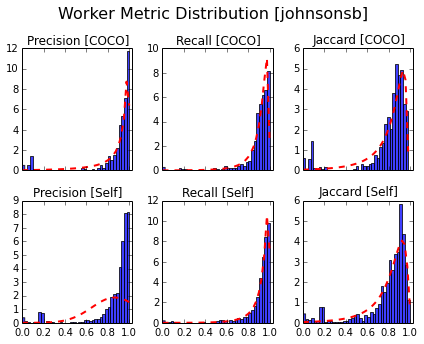

In [258]:
plot_fitted_worker_histo(johnsonsb)

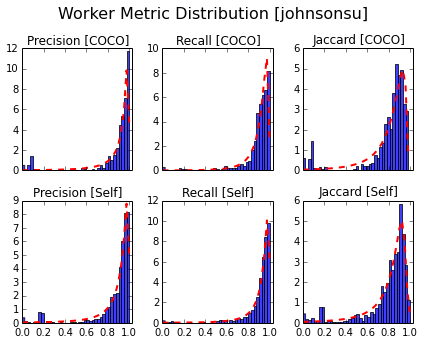

In [259]:
plot_fitted_worker_histo(johnsonsu)

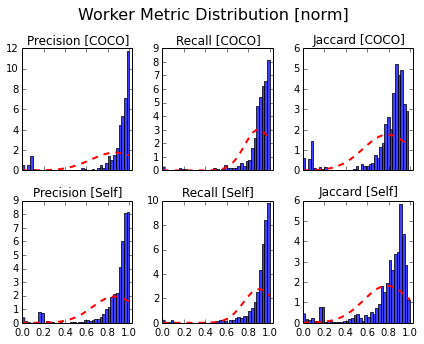

In [260]:
plot_fitted_worker_histo(norm)

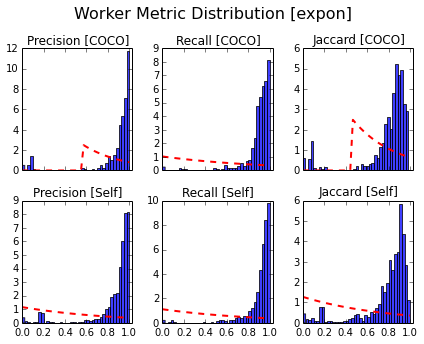

In [261]:
plot_fitted_worker_histo(expon)

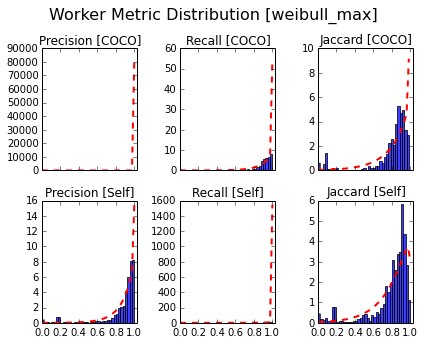

In [265]:
plot_fitted_worker_histo(weibull_max)

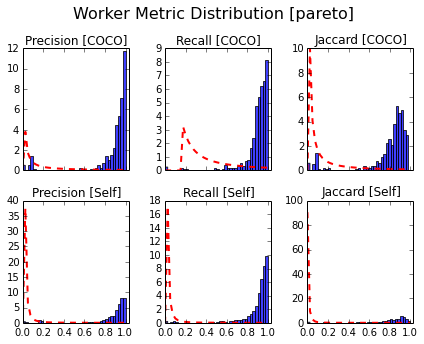

In [267]:
plot_fitted_worker_histo(pareto)

### Power law also seems like a decent fit, lets look at the parameters for these powerlaw fits 

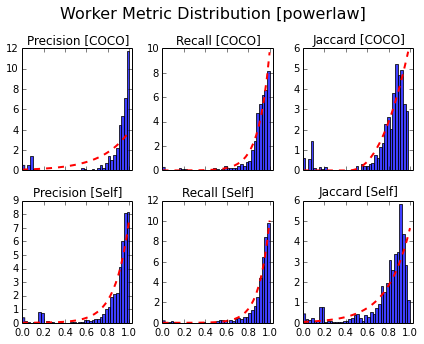

In [263]:
plot_fitted_worker_histo(powerlaw)

```
powerlaw.pdf
a : array_like
    shape parameters
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
```    

In [287]:
bigpowtbl = df_stats_tbl[df_stats_tbl['Function Name']=='powerlaw'].drop("Function Name",axis=1)

In [288]:
powtbl  = bigpowtbl['Parameters'].apply(pd.Series)

In [289]:
powtbl.columns =["Power","Shift","Scale"]

In [295]:
bigpowtbl = bigpowtbl.drop("Parameters",axis=1)

In [299]:
print tabulate(bigpowtbl.join(powtbl),showindex="False",headers='keys',tablefmt='latex')

\begin{tabular}{lrrrrrr}
\hline
 metric           &      RSS &   D-value &    p-value &            Power &            Shift &           Scale \\
\hline
 Precision [COCO] & 73.7617  &  0.366667 & 0.0258563  &      1.59361e+07 &     -4.15389e+06 &     4.15389e+06 \\
 Recall [COCO]    &  4.9709  &  0.433333 & 0.00460707 &      1.82255e+07 &     -1.88288e+06 &     1.88289e+06 \\
 Jaccard [COCO]   & 12.677   &  0.466667 & 0.00174595 &      3.28257     &      0.420069    &     0.562608    \\
 Precision [Self] & 12.155   &  0.366667 & 0.0258563  &      7.71049e+06 &     -1.01398e+06 &     1.01399e+06 \\
 Recall [Self]    &  5.20468 &  0.466667 & 0.00174595 &   4050.15        &   -402.114       &   403.114       \\
 Jaccard [Self]   & 18.1984  &  0.333333 & 0.054993   & 185958           & -39975.9         & 39976.9         \\
\hline
\end{tabular}
